In [155]:
import sys
import time
import pandas as pd

sys.path.append('../')
from lib.functions import *
#from trace_classification import *
import sklearn.metrics as sm

from sklearn.neighbors import NearestNeighbors

# Network Attacked/Not Attacked by node

## Kmeans

In [218]:
directory="../cooja3-16nodes/"
df = pd.read_csv(directory+"stats_corrected2.csv")

corr=df["type_corrected"].values
correction=[]



features_to_drop=[
        "label",
    # "mean",
      #  "var",
        # "std",
       #  "packet loss",
       #  "outliers",
       #  "hop",
    #"count",
        "node",
    "type",
    "type_corrected",
    "type_corrected_2"
        
       
    ]
for i in range(len(corr)):
    if(i=="normal"):
        correction.append(0)
    else: 
        correction.append(1)
data = df.drop(features_to_drop, axis=1)

kmeans = KMeans(n_clusters=2)
kmeans.fit(data)
labels = kmeans.predict(data)

labels = accuracy_score_corrected(correction, labels)

accuracy=sm.accuracy_score(correction,labels)
confusion_matrix=sm.confusion_matrix(correction, labels)
print(accuracy)
print(confusion_matrix)
kmeans=df

predicted=[]
for i in range(len(labels)):
    if(labels[i]==0):
        predicted.append("normal")
    else:
        predicted.append("abnormal")
kmeans["predicted"]=predicted
kmeans[kmeans["predicted"]=="normal"]

0.9086538461538461
[[  0   0]
 [ 19 189]]


,label,type,type_corrected,type_corrected_2,packet loss,node,count,std,mean,var,hop,outliers,predicted
98,grid_normal_2019-02-26_10:29_,normal,normal,normal,32,aaaa::212:740e:e:e0e,68,914.987522,1230.882353,8.372022e+05,5,3,normal
132,grid_normal_2019-02-26_11:48_,normal,normal,normal,43,aaaa::212:740f:f:f0f,57,841.723066,1208.315789,7.084977e+05,4,5,normal
136,grid_normal_2019-02-26_10:29_,normal,normal,normal,45,aaaa::212:740f:f:f0f,55,1242.430555,1204.381818,1.543634e+06,4,3,normal
144,grid_1gh30-7_2019-02-19_22:35_,BH,normal,normal,49,aaaa::212:7410:10:1010,51,1161.584491,1069.901961,1.349279e+06,4,1,normal
146,grid_normal_2019-02-26_10:29_,normal,normal,normal,49,aaaa::212:740b:b:b0b,51,917.246673,1019.019608,8.413415e+05,4,3,normal
148,grid_normal_2019-02-26_10:29_,normal,normal,normal,50,aaaa::212:7408:8:808,50,786.154900,691.940000,6.180395e+05,2,2,normal
151,grid_1gh50-7_2019-02-19_22:53_,BH,normal,normal,51,aaaa::212:7411:11:1111,49,871.933195,884.591837,7.602675e+05,5,3,normal
155,grid_normal_2019-02-26_10:29_,normal,normal,normal,51,aaaa::212:7411:11:1111,49,1002.303846,1196.857143,1.004613e+06,5,3,normal
159,grid_1gh30-7_2019-02-19_22:35_,BH,normal,normal,52,aaaa::212:740c:c:c0c,48,1036.510628,918.875000,1.074354e+06,3,3,normal
175,grid_normal_2019-02-26_10:29_,normal,normal,GH,56,aaaa::212:7409:9:909,44,846.603672,936.613636,7.167378e+05,3,3,normal


We have 0.90  (90%) of accuracy in detecting if the node is part affected by a malicious one

Understanding the distribution

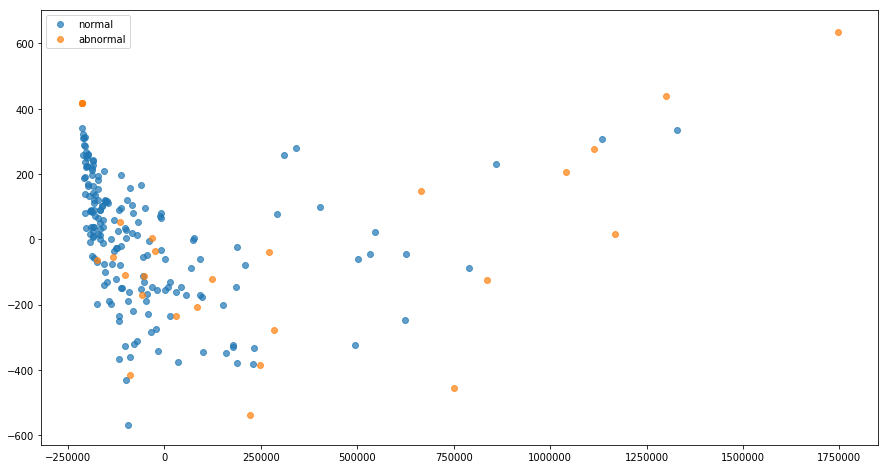

In [37]:
X = data.iloc[:,0:4]
pca = PCA(n_components=2)
pca.fit(X)
X_ = pca.transform(X)

dfPCA = pd.DataFrame({'x1': X_[:,0], 'x2': X_[:,1]})
dfPCA['labels'] = df['type_corrected']
dfPCA.head()

labels = df['type_corrected'].unique().tolist()
plt.figure(figsize=(15,8))
for lab in labels:
    plt.scatter(dfPCA.loc[dfPCA['labels'] == lab, 'x1'],  dfPCA.loc[dfPCA['labels'] == lab, 'x2'], label=lab, alpha=0.7)
    plt.legend()


In [39]:

results=pd.DataFrame()
#####KNN
n_estimators=100
test_size=0.3
n_neighbors=3
# separate features from target values
features = df.drop(columns=features_to_drop).drop(columns="predicted")

target = df['type_corrected'].values
# split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=test_size, random_state=1)
knn = KNeighborsClassifier(n_neighbors=n_neighbors) 
#t0 = time.time()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

results = pd.concat([results,pd.DataFrame({'Model': ['KNN'], 
                                               'Window Size': ["100"],
                                               'Accuracy': [metrics.accuracy_score(y_test, y_pred)],
                                               'Precision': [metrics.precision_score(y_test, y_pred, average='macro')],
                                               'Recall': [metrics.recall_score(y_test, y_pred, average='macro')], 
                                               'F1-score': [metrics.f1_score(y_test, y_pred, average='macro')],
                                               #'Time (ms)': [time.time() - t0]
                                              })])
results

,Model,Window Size,Accuracy,Precision,Recall,F1-score
0,KNN,100,0.888889,0.848276,0.690566,0.735135


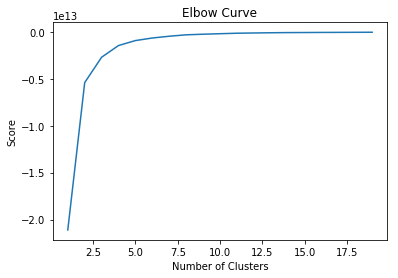

In [31]:
Y=data
Nc = range(1, 20)

kmeans = [KMeans(n_clusters=i) for i in Nc]

kmeans


score = [kmeans[i].fit(Y).score(Y) for i in range(len(kmeans))]

score

plt.plot(Nc,score)

plt.xlabel('Number of Clusters')

plt.ylabel('Score')

plt.title('Elbow Curve')

plt.show()

## Type of attack classification

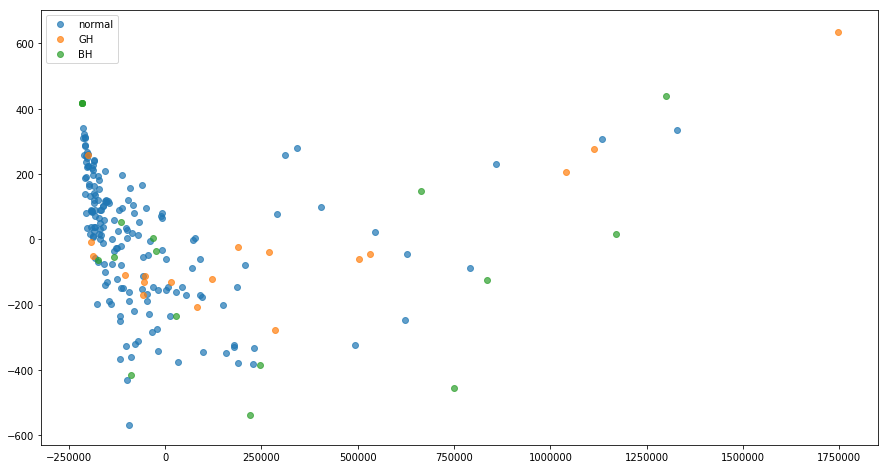

In [40]:
X = data.iloc[:,0:4]
pca = PCA(n_components=2)
pca.fit(X)
X_ = pca.transform(X)

dfPCA = pd.DataFrame({'x1': X_[:,0], 'x2': X_[:,1]})
dfPCA['labels'] = df['type_corrected_2']
dfPCA.head()

labels = df['type_corrected_2'].unique().tolist()
plt.figure(figsize=(15,8))
for lab in labels:
    plt.scatter(dfPCA.loc[dfPCA['labels'] == lab, 'x1'],  dfPCA.loc[dfPCA['labels'] == lab, 'x2'], label=lab, alpha=0.7)
    plt.legend()


In [219]:

results=pd.DataFrame()
#####KNN
n_estimators=100
test_size=0.3
n_neighbors=3
# separate features from target values
features = df.drop(columns=features_to_drop).drop(columns="predicted")

target = df['type_corrected_2'].values
# split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=test_size, random_state=1)
knn = KNeighborsClassifier(n_neighbors=n_neighbors) 
#t0 = time.time()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

results = pd.concat([results,pd.DataFrame({'Model': ['KNN'], 
                                               'Window Size': ["100"],
                                               'Accuracy': [metrics.accuracy_score(y_test, y_pred)],
                                               'Precision': [metrics.precision_score(y_test, y_pred, average='macro')],
                                               'Recall': [metrics.recall_score(y_test, y_pred, average='macro')], 
                                               'F1-score': [metrics.f1_score(y_test, y_pred, average='macro')],
                                               #'Time (ms)': [time.time() - t0]
                                              })])
results

,Model,Window Size,Accuracy,Precision,Recall,F1-score
0,KNN,100,0.825397,0.531609,0.451667,0.469136


In [220]:
df.head()
df_labels=df["label"].unique().tolist()
df_nodes=df["node"].unique().tolist()
#print(df_nodes)

results = pd.read_csv(directory+"results_total_node.csv")
total=pd.DataFrame()
for label in df_labels:
    for node in df_nodes:
        case=df.loc[df["label"]==label ]
        node_case=case.loc[case["node"]==node]
        if(len(node_case)>0 ):
            a=results.loc[results["label"]==label].loc[results["node"]==node]
            a["type_corrected_2"]=node_case["type_corrected_2"].iloc[0]
            #print(node_case["type_corrected_2"].iloc[0])
            total=total.append(a,ignore_index=True)
            

In [221]:
results.head()

,Unnamed: 0,label,type,count,std,mean,var,hop,packet loss,outliers,node,window,predicted,predicted number,correction number
0,0,grid_normal_2019-02-26_11:48_,normal,18,494.986512,851.000000,245011.647059,5,28.0,2,aaaa::212:740e:e:e0e,25,normal,1,1
1,1,grid_normal_2019-02-26_11:48_,normal,13,928.231252,1229.384615,861613.256410,5,48.0,1,aaaa::212:740e:e:e0e,25,BH,0,1
2,2,grid_normal_2019-02-26_11:48_,normal,4,80.483435,976.750000,6477.583333,5,84.0,0,aaaa::212:740e:e:e0e,25,BH,0,1
3,3,grid_normal_2019-02-26_11:48_,normal,19,528.362238,895.105263,279166.654971,5,24.0,2,aaaa::212:740e:e:e0e,25,normal,1,1
4,4,grid_normal_2019-02-26_11:48_,normal,10,383.198527,558.000000,146841.111111,2,60.0,1,aaaa::212:7408:8:808,25,BH,0,1


In [266]:
def KNN_stats(df,columns_to_drop,window=[25,50,100]):

    results=pd.DataFrame()
    test_size=0.3
    
    for w in window:
        df=total[total["window"]==w]
        
        target = df['type_corrected_2'].values
        df=df.drop(columns=columns_to_drop)
        
        df=df.drop(columns=["node","label","type","type_corrected_2"])
        # split dataset into train and test data
        X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=test_size, random_state=1)
        knn = KNeighborsClassifier(n_neighbors=n_neighbors) 
        #t0 = time.time()
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)

        results = pd.concat([results,pd.DataFrame({'Model': ['KNN'], 
                                                       'Window Size': [w],
                                                       'Accuracy': [metrics.accuracy_score(y_test, y_pred)],
                                                       'Precision': [metrics.precision_score(y_test, y_pred, average='macro')],
                                                       'Recall': [metrics.recall_score(y_test, y_pred, average='macro')], 
                                                       'F1-score': [metrics.f1_score(y_test, y_pred, average='macro')],
                                                       #'Time (ms)': [time.time() - t0]
                                                      })])
    return results

In [273]:
columns_to_drop=["Unnamed: 0","predicted", "predicted number", "correction number",
                         
                 "mean",
                 "std",
                 "var",
                 "count",
                 "hop","outliers",
                 #"window"
                ]
results=KNN_stats(total,columns_to_drop)
results

/usr/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


,Model,Window Size,Accuracy,Precision,Recall,F1-score
0,KNN,25,0.840000,0.526714,0.489437,0.497264
0,KNN,50,0.880000,0.760913,0.661294,0.688738
0,KNN,100,0.984127,0.962963,0.952381,0.954751


In [225]:

def correct_stats(df,directory):
    df_labels=df["label"].unique().tolist()
    df_nodes=df["node"].unique().tolist()
    #print(df_nodes)

    results = pd.read_csv(directory+"results_total_node.csv")
    total=pd.DataFrame()
    for label in df_labels:
        for node in df_nodes:
            case=df.loc[df["label"]==label ]
            node_case=case.loc[case["node"]==node]
            if(len(node_case)>0 ):
                a=results.loc[results["label"]==label].loc[results["node"]==node]
                a["type_corrected_2"]=node_case["type_corrected_2"].iloc[0]
                #print(node_case["type_corrected_2"].iloc[0])
                total=total.append(a,ignore_index=True)
    total=total.rename(columns={
        'label':'experiment',
        'type_corrected_2': 'label',
        'node':"node_id",
        "packet loss":"loss",
        
    }).drop(columns="Unnamed: 0")
    return total        

In [258]:
def kmeans_classification(trace_stats,features_to_drop):
    results = pd.DataFrame()
    for trace_size in trace_stats:
        print('Computing trace {}'.format(trace_size))
        trace = trace_stats[trace_size]
        target=trace["label"].values
        correction=[]
        for i in range(len(target)):
            if(i=="normal"):
                correction.append(0)
            else: 
                correction.append(1)
                
        features = trace.drop(columns=features_to_drop)
        
        print(features.columns)
        t0 = time.time()  # Start a timer
        kmeans = KMeans(n_clusters=2)
        kmeans.fit(features)
        labels = kmeans.predict(features)
        labels = accuracy_score_corrected(correction, labels)
        kmeans=df
        predicted=[]
        for i in range(len(labels)):
            if(labels[i]==0):
                predicted.append("normal")
            else:
                predicted.append("abnormal")
        #kmeans["predicted"]=predicted
        #kmeans[kmeans["predicted"]=="normal"]
        results = pd.concat([results, pd.DataFrame({'Model': ['Kmeans'],
                                                        'Window Size': [trace_size],
                                                        'Accuracy': [metrics.accuracy_score(correction, labels)],
                                                        'Precision': [
                                                            metrics.precision_score(correction, labels, average='macro')],
                                                        'Recall': [
                                                            metrics.recall_score(correction, labels, average='macro')],
                                                        'F1-score': [metrics.f1_score(correction, labels, average='macro')],
                                                        'Time (ms)': [time.time() - t0]})])
    return results

In [238]:
directory="../cooja3-16nodes/"
df = pd.read_csv(directory+"stats_corrected2.csv")
df=correct_stats(df)
data=df.copy()
features_to_drop=["experiment","predicted", "predicted number", "correction number","node_id","type",
                         "mean",
                  #"std","var","count","hop","outliers","window",
                  "label","experiment"]
win_25_stats=df[df["window"]==25]
win_50_stats=df[df["window"]==50]
win_100_stats=df[df["window"]==100]
trace_stats = {25: win_25_stats, 50: win_50_stats, 100: win_100_stats}



results = None            # Results from each classification algorithm
cv_results = None 

In [259]:

kmeans_classification(trace_stats,features_to_drop)


Computing trace 25
Index(['count', 'std', 'var', 'hop', 'loss', 'outliers', 'window'], dtype='object')
Computing trace 50
Index(['count', 'std', 'var', 'hop', 'loss', 'outliers', 'window'], dtype='object')
Computing trace 100
Index(['count', 'std', 'var', 'hop', 'loss', 'outliers', 'window'], dtype='object')


/usr/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with

,Model,Window Size,Accuracy,Precision,Recall,F1-score,Time (ms)
0,Kmeans,25,0.967548,0.5,0.483774,0.491753,0.054441
0,Kmeans,50,0.949519,0.5,0.474760,0.487053,0.044348
0,Kmeans,100,0.908654,0.5,0.454327,0.476071,0.022457
